# Liver Cirrhosis Stage Prediction - EDA

In this notebook we'll gather information about the dataset.

# 📚 1. Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import warnings
warnings.simplefilter(action="ignore", category=Warning)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')

# 📖 2. Load Data

In [4]:
raw_data = pd.read_csv('./Data/Raw/liver_cirrhosis.csv')
raw_data.shape

(25000, 19)

In [5]:
# Creating a copy of the dataframe in case we need the raw data in the next sections
df = raw_data.copy()

## 2.1. Data Overview

In [6]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.500,149.000,4.040,227.000,598.000,52.700,57.000,256.000,9.900,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.500,219.000,3.930,22.000,663.000,45.000,75.000,220.000,10.800,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.500,320.000,3.540,51.000,1243.000,122.450,80.000,225.000,10.000,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.700,255.000,3.740,23.000,1024.000,77.500,58.000,151.000,10.200,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.900,486.000,3.540,74.000,1052.000,108.500,109.000,151.000,11.500,1


In [7]:
df.tail()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.800,231.000,3.870,173.000,9009.800,127.710,96.000,295.000,11.000,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.800,231.000,3.870,173.000,9009.800,127.710,96.000,295.000,11.000,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.100,369.511,3.230,18.000,790.000,179.800,124.702,104.000,13.000,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.800,315.000,4.240,13.000,1637.000,170.500,70.000,426.000,10.900,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.800,315.000,4.240,13.000,1637.000,170.500,70.000,426.000,10.900,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

🔎 **Observations:**

- We have 25000 records in the dataset.
- We have 18 independent and 1 dependent (target) variable in the dataset.
- Lookse like there are no null values.
- Age can be turned into years

# ✅ 3. Sanity Check

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1. Checking for Missing Values

In [9]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [10]:
# Checking some random records to see if there is any value which could replace null and may be missed by the above function.
df.sample(20, random_state=101)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
7799,3672,C,Placebo,23376,F,Y,N,Y,N,0.700,204.000,3.660,28.000,685.000,72.850,58.000,314.000,10.800,2
4427,1882,C,Placebo,14060,F,N,Y,N,N,13.000,1336.000,4.160,71.000,3510.000,209.250,111.000,338.000,11.900,2
14941,1769,C,Placebo,18628,F,Y,Y,Y,N,0.600,299.000,3.360,23.000,2769.000,220.100,85.000,190.000,11.600,3
11644,4467,C,Placebo,20736,F,N,N,N,N,1.300,369.511,3.340,105.000,11046.600,104.490,124.702,382.000,10.400,3
15548,2534,C,Placebo,16802,F,Y,N,Y,N,0.800,369.511,3.290,97.648,1982.656,122.556,124.702,419.000,10.732,1
22245,460,D,Placebo,16658,F,N,Y,Y,S,5.000,325.000,3.470,110.000,2460.000,246.450,56.000,430.000,11.900,3
12184,4467,C,Placebo,23741,F,Y,N,Y,N,1.300,369.511,3.340,105.000,11046.600,104.490,124.702,155.000,10.100,3
11353,1786,D,D-penicillamine,23585,F,N,Y,N,N,0.900,404.000,3.430,34.000,1866.000,79.050,224.000,277.000,9.900,2
7626,1701,C,Placebo,17947,M,N,N,N,N,1.100,336.000,3.740,48.000,823.000,84.000,108.000,214.000,11.000,2
22722,1614,C,D-penicillamine,20567,F,N,N,N,N,0.500,318.000,3.320,52.000,613.000,70.000,260.000,279.000,10.200,2


🔎 **Observations:** Seems there are no missing value from the dataset.

## 3.2. Checking for Duplicates

In [11]:
df.duplicated().sum()

15361

🔎 **Observations:** We have a lot of duplicate values which should be dropped before the EDA section as it might impact the statistical inference about the dataset.

## 3.3. Checking for Data Types

In [12]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [13]:
# Since it's a classification problem, we'll convert the target into object datatype
df['Stage'] = df['Stage'].astype('object')

In [14]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 8 ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
Numeric columns: 11 ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


In [15]:
# Removing the label from the categorical column list
cat_features = cat_cols[:-1]
target = 'Stage'

## 3.4. Checking the number of unique values of each column

In [16]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

## 3.5. Summary Statistics

In [17]:
# Before checking the summary stats, we need to remove the duplicates to remove the impact on the statistics
df = df.drop_duplicates().reset_index(drop=True)

In [18]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,9639.000,9639.000,9639.000,9639.000,9639.000,9639.000,9639.000,9639.000,9639.000,9639.000,9639.000
mean,1910.983,18429.718,3.229,371.707,3.496,97.028,1973.573,122.317,123.587,253.788,10.713
std,1093.620,3693.953,4.512,197.824,0.382,73.109,1827.063,47.654,55.206,95.741,0.922
min,41.000,9598.000,0.300,120.000,1.960,4.000,289.000,26.350,33.000,62.000,9.000
25%,1103.000,15628.000,0.800,271.000,3.290,51.000,1031.000,89.900,93.000,188.000,10.000
50%,1690.000,18628.000,1.300,369.511,3.520,97.648,1713.000,122.556,124.702,249.000,10.600
75%,2598.000,20819.000,3.300,369.511,3.760,102.000,1982.656,134.850,125.000,307.000,11.100
max,4795.000,28650.000,28.000,1775.000,4.640,588.000,13862.400,457.250,598.000,721.000,18.000


In [19]:
df.to_csv('./Data/Processed/df_no_duplicates.csv', index=False)

# 📊 4. Exploratory Data Analysis (EDA) and Visualization

## 4.1. Univairate Analysis

### 4.1.1. Categorical Columns

In [20]:
# Function to create labeled barplots for categorical features
def plot_counts(data, features, hue=None):
    
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - features <list>: List of categorical columns in dataframe to be visualized.
    - hue <string>: Name of the hue.
    """
    
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(features)/n_cols)) 

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        #bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
        sb.countplot(
            data = data,
            x = feature,
            palette = 'Paired',
            hue = hue,
            ax = axes[i]
        )
        # Display count of each level of the category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2 # Width of the plot
            y = p.get_height() # Height of the plot
            
            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

            axes[i].annotate(
                '{:.0f}'.format(label),
                (x, y),
                ha = 'center',
                va = 'center',
                size = 12,
                xytext = (0, 5),
                textcoords = 'offset points',
                rotation = rotation
            )
            
        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=0)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

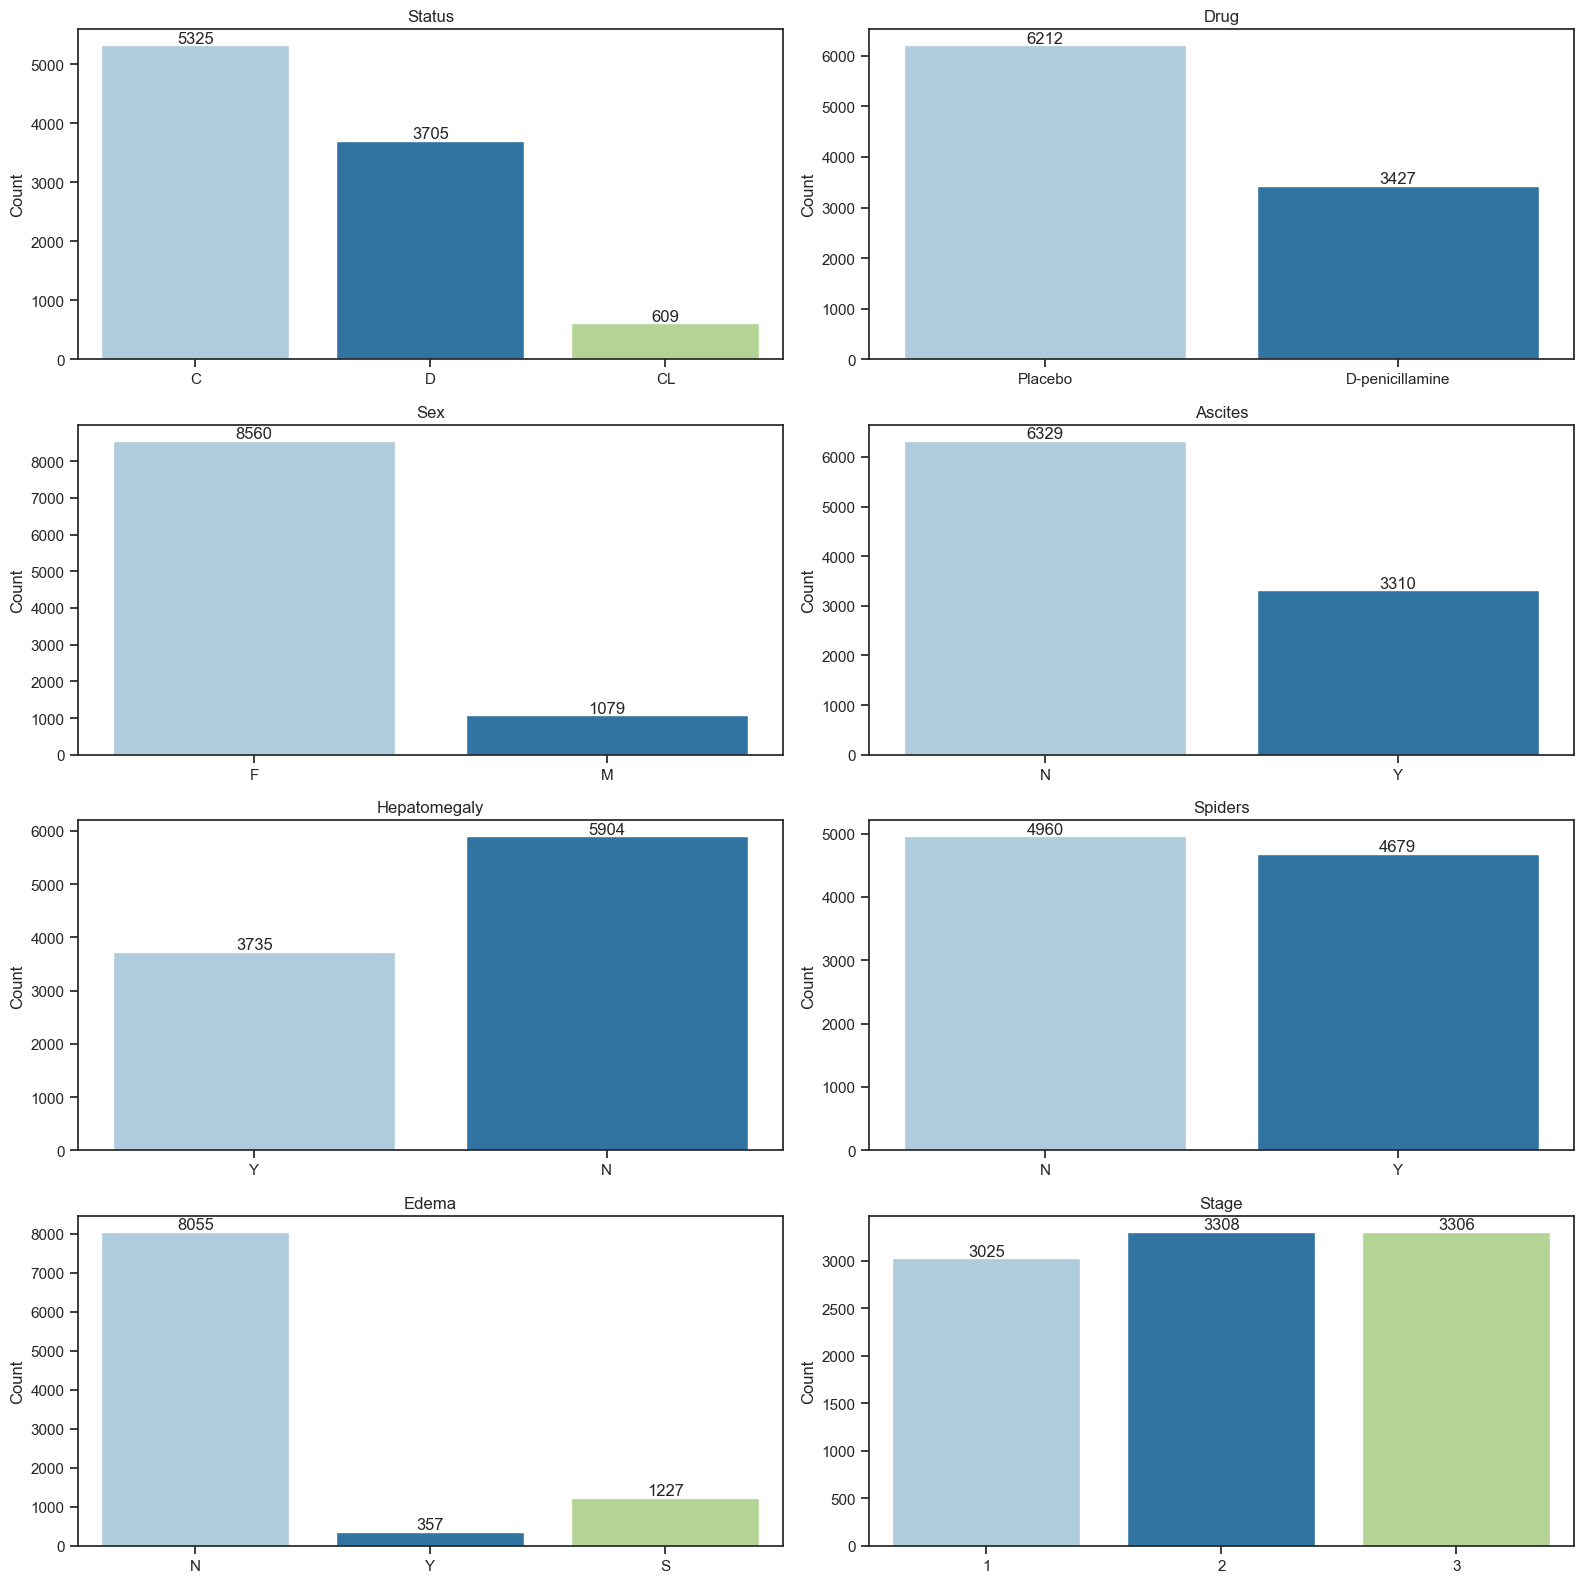

In [21]:
plot_counts(df, cat_cols)

🔎 **Observations:**

- The dataset is balanced so we can use accuracy as a performance metric in this problem.
- Majority of the records are belong to female patients.
- The ratio of the records with Edema Y (edema despite diuretic therapy) is low. This might have impact on the performance of the model based on the relation of this predictor with the label.

### 4.1.2. Numeric Columns

In [22]:
def dist_plot(data, feature_list):
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(feature_list)/n_cols)) 

    # Create figure
    fig = plt.figure(figsize=(16, 4*n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                                 wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

        ax_box = plt.Subplot(fig, inner[0])
        sb.boxplot(data=data, x=feature_list[i], color='lightblue', ax=ax_box)
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        mean_value = data[feature_list[i]].mean()
        median_value = data[feature_list[i]].median()
        ax_hist = plt.Subplot(fig, inner[1])
        sb.histplot(data=data, x=feature_list[i], kde=True, ax=ax_hist)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        # Add a legend
        ax_hist.legend(loc='lower right', fontsize=10)

        # Calculate skewness and kurtosis
        skewness = data[feature_list[i]].skew()
        kurt = data[feature_list[i]].kurt()
        if skewness < 0:
            x=0.25
        else:
            x=0.95
        # Add skewness and kurtosis as text on the histogram plot
        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                         transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                    fontsize=10)
        fig.add_subplot(ax_hist)

    plt.tight_layout()
    plt.show(block=False)

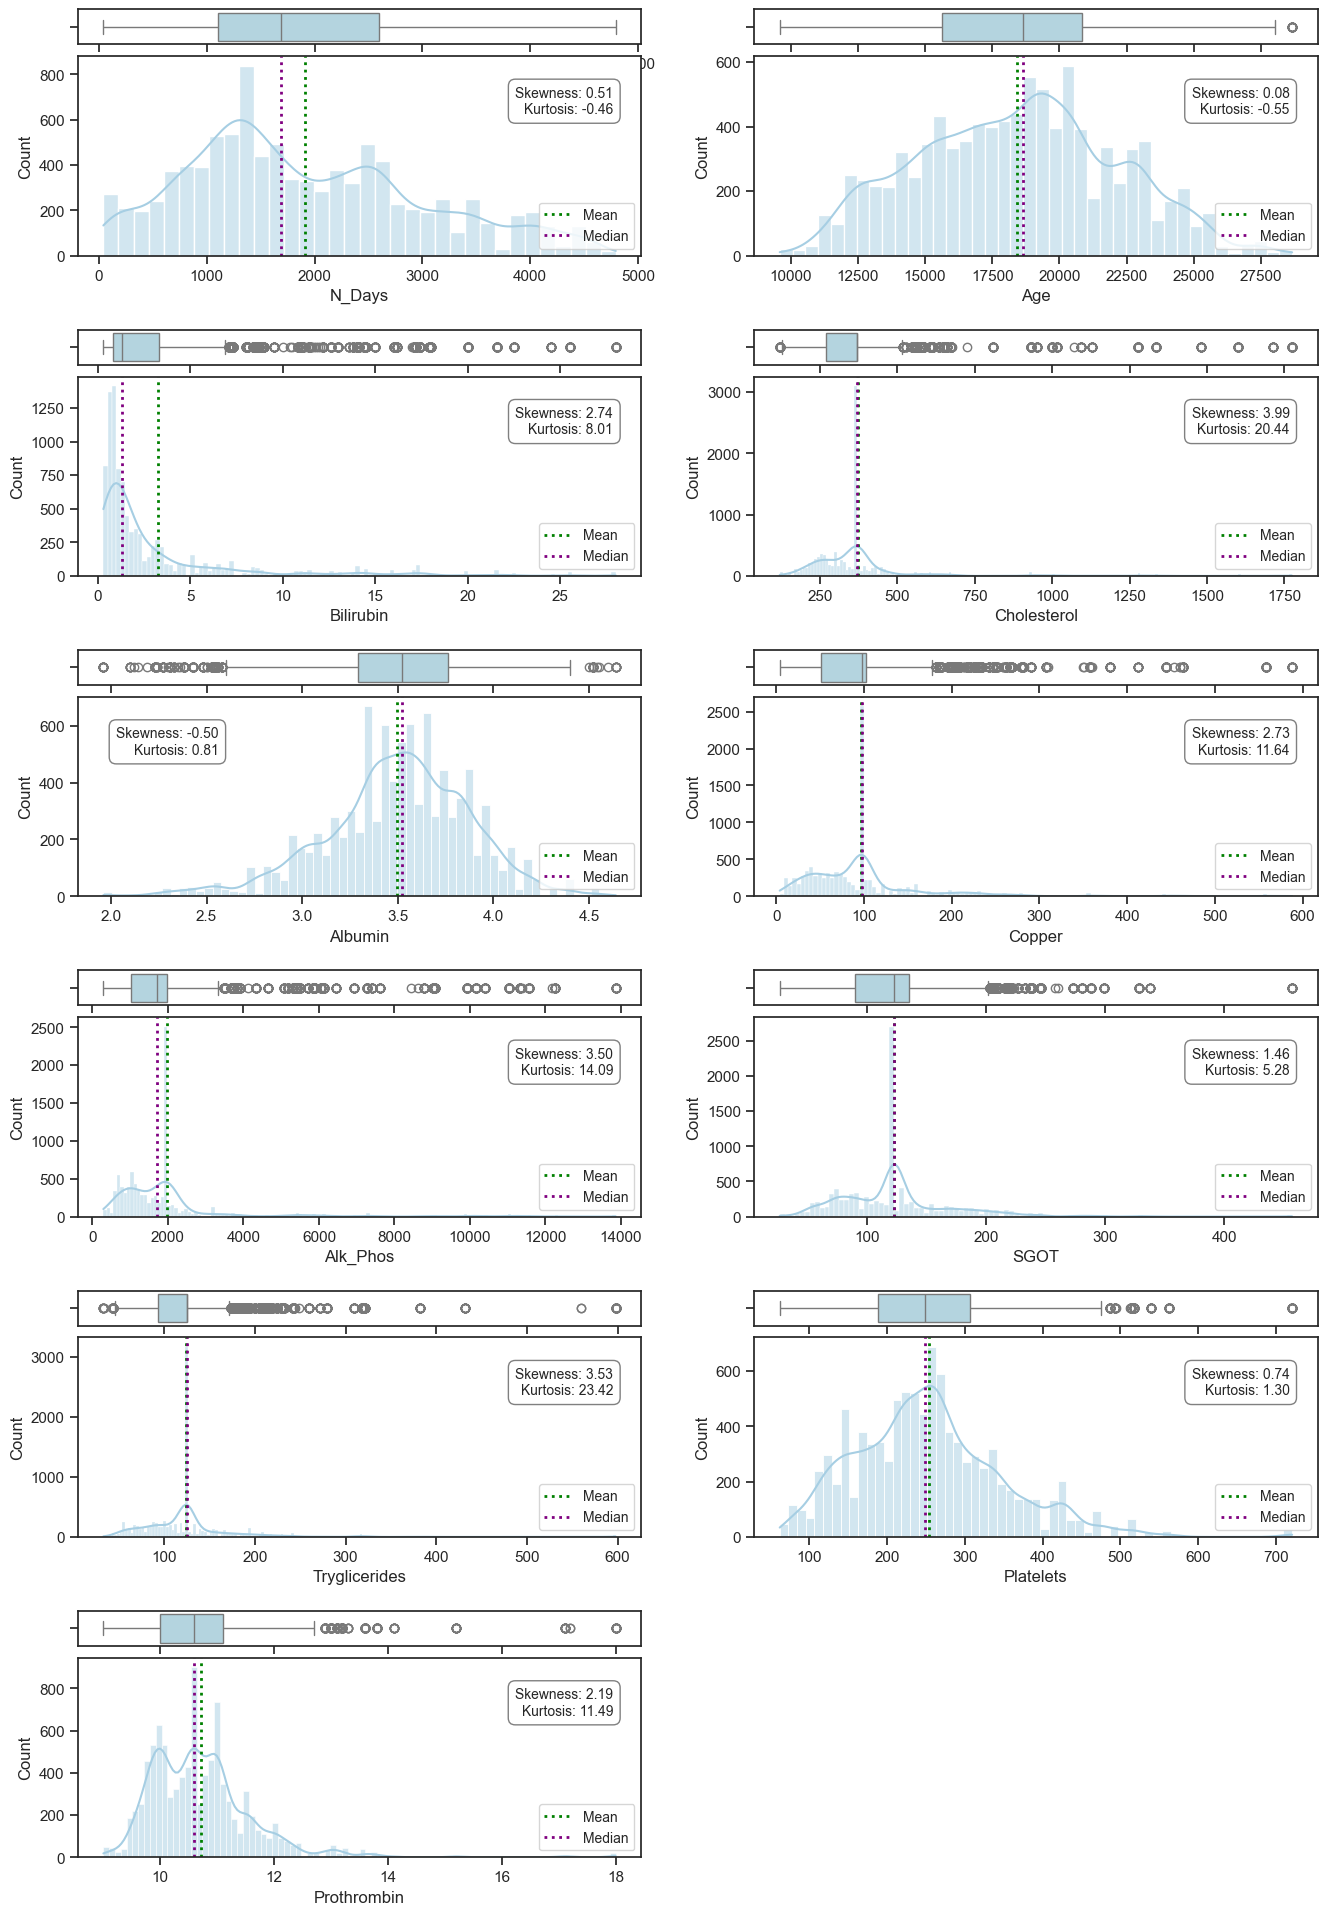

In [23]:
dist_plot(df, num_cols)

🔎 **Observations:**

- Most of the numeric features don't follow the normal distribution. That's why we'll check which type of transformation method fits best for wich feature.
- But first we'll handle the outliers as follows:
    - Age <= 27500
    - Bilirubin <= 10
    - Cholesterol <= 600
    - 2.5 <= Albumin <= 4.5
    - Copper <= 200
    - Alk_Phos <= 4000
    - SGOT <= 200
    - Tryglicerides <= 200
    - Platelets <= 500
    - Prothrombin <= 13

## 4.2. Bi-variate Analysis

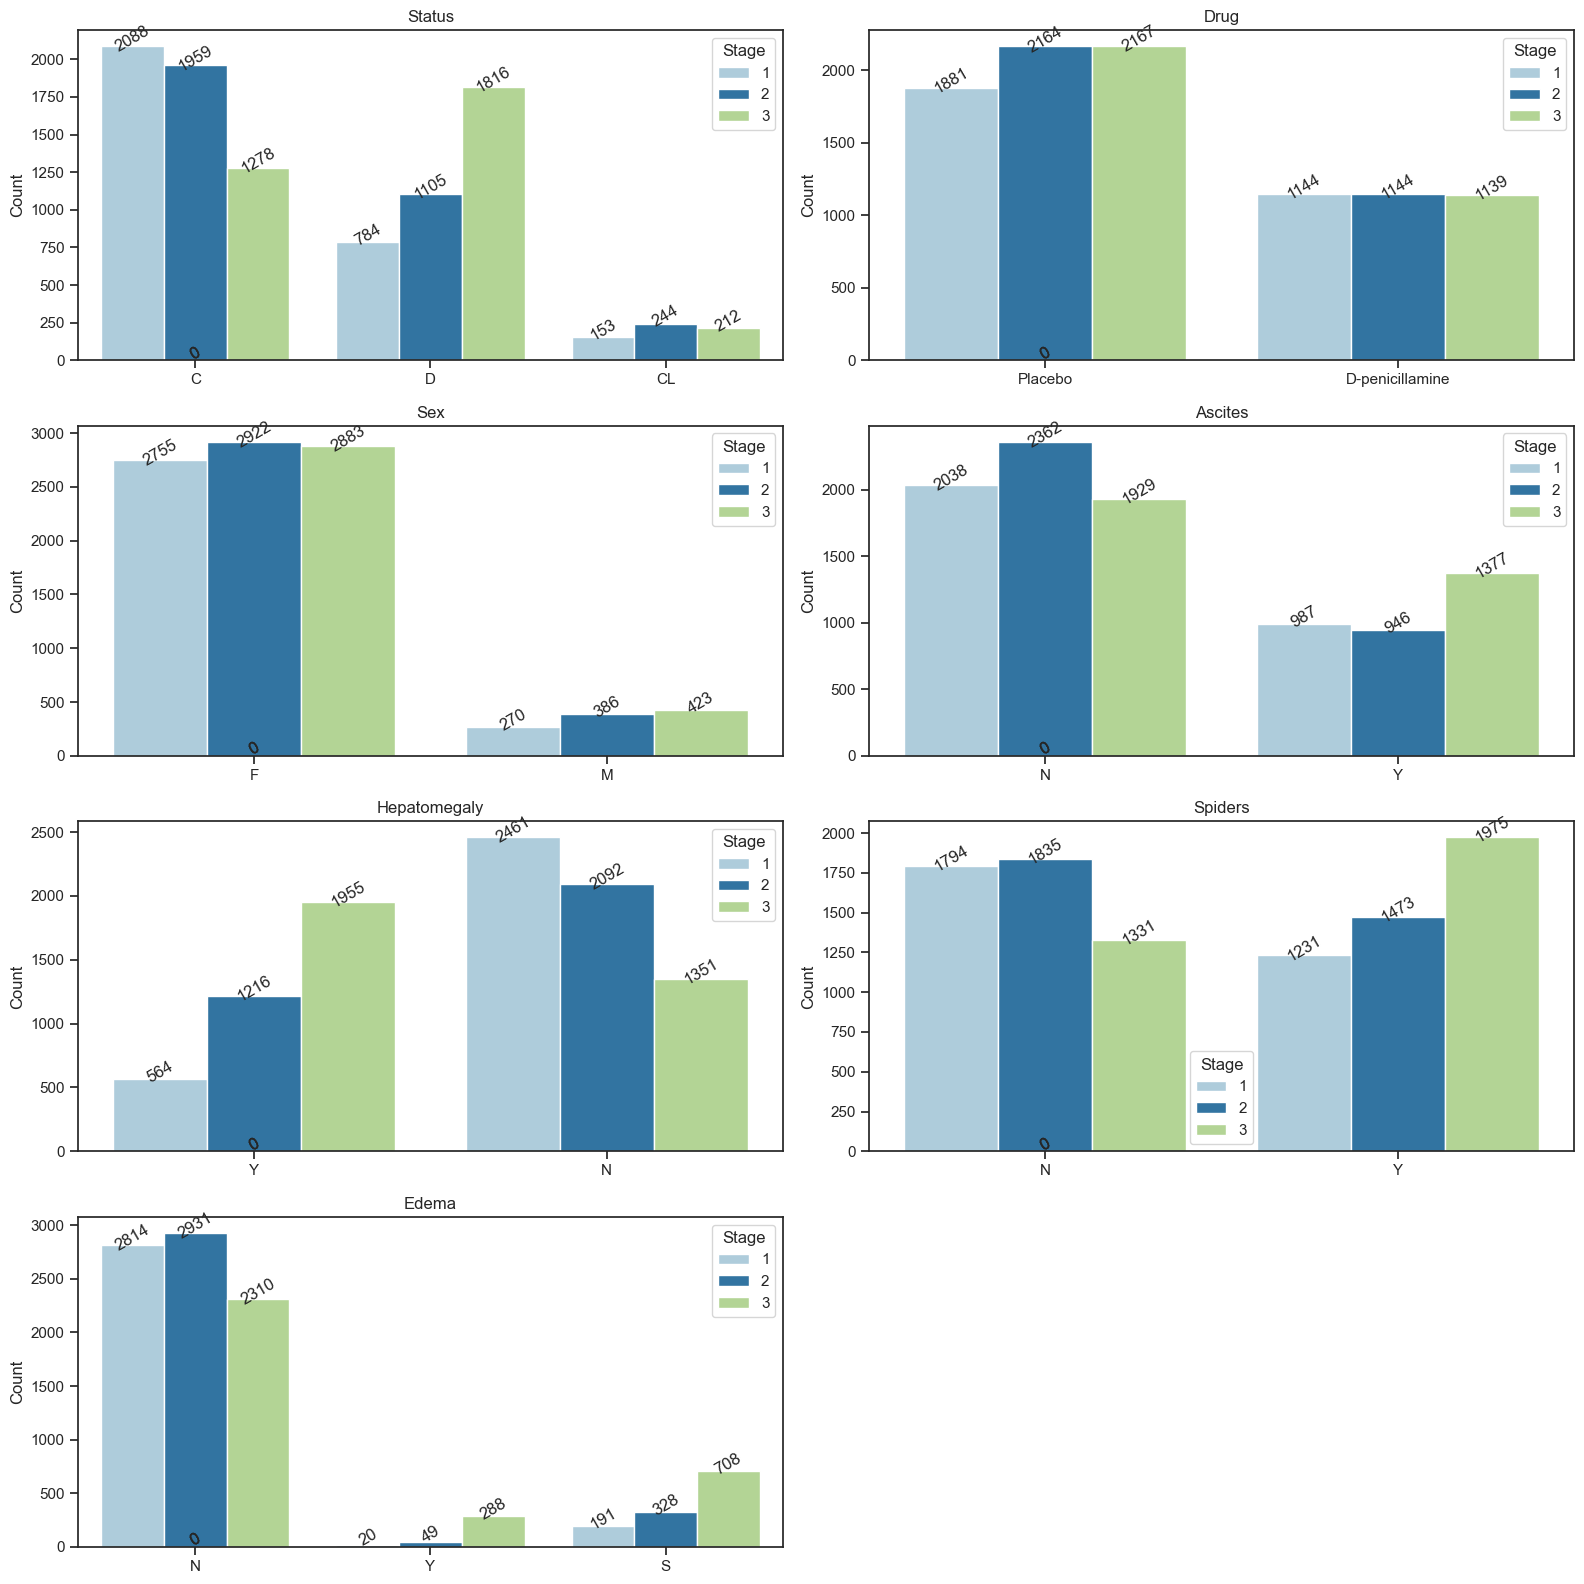

In [24]:
plot_counts(df, cat_features, hue=target)

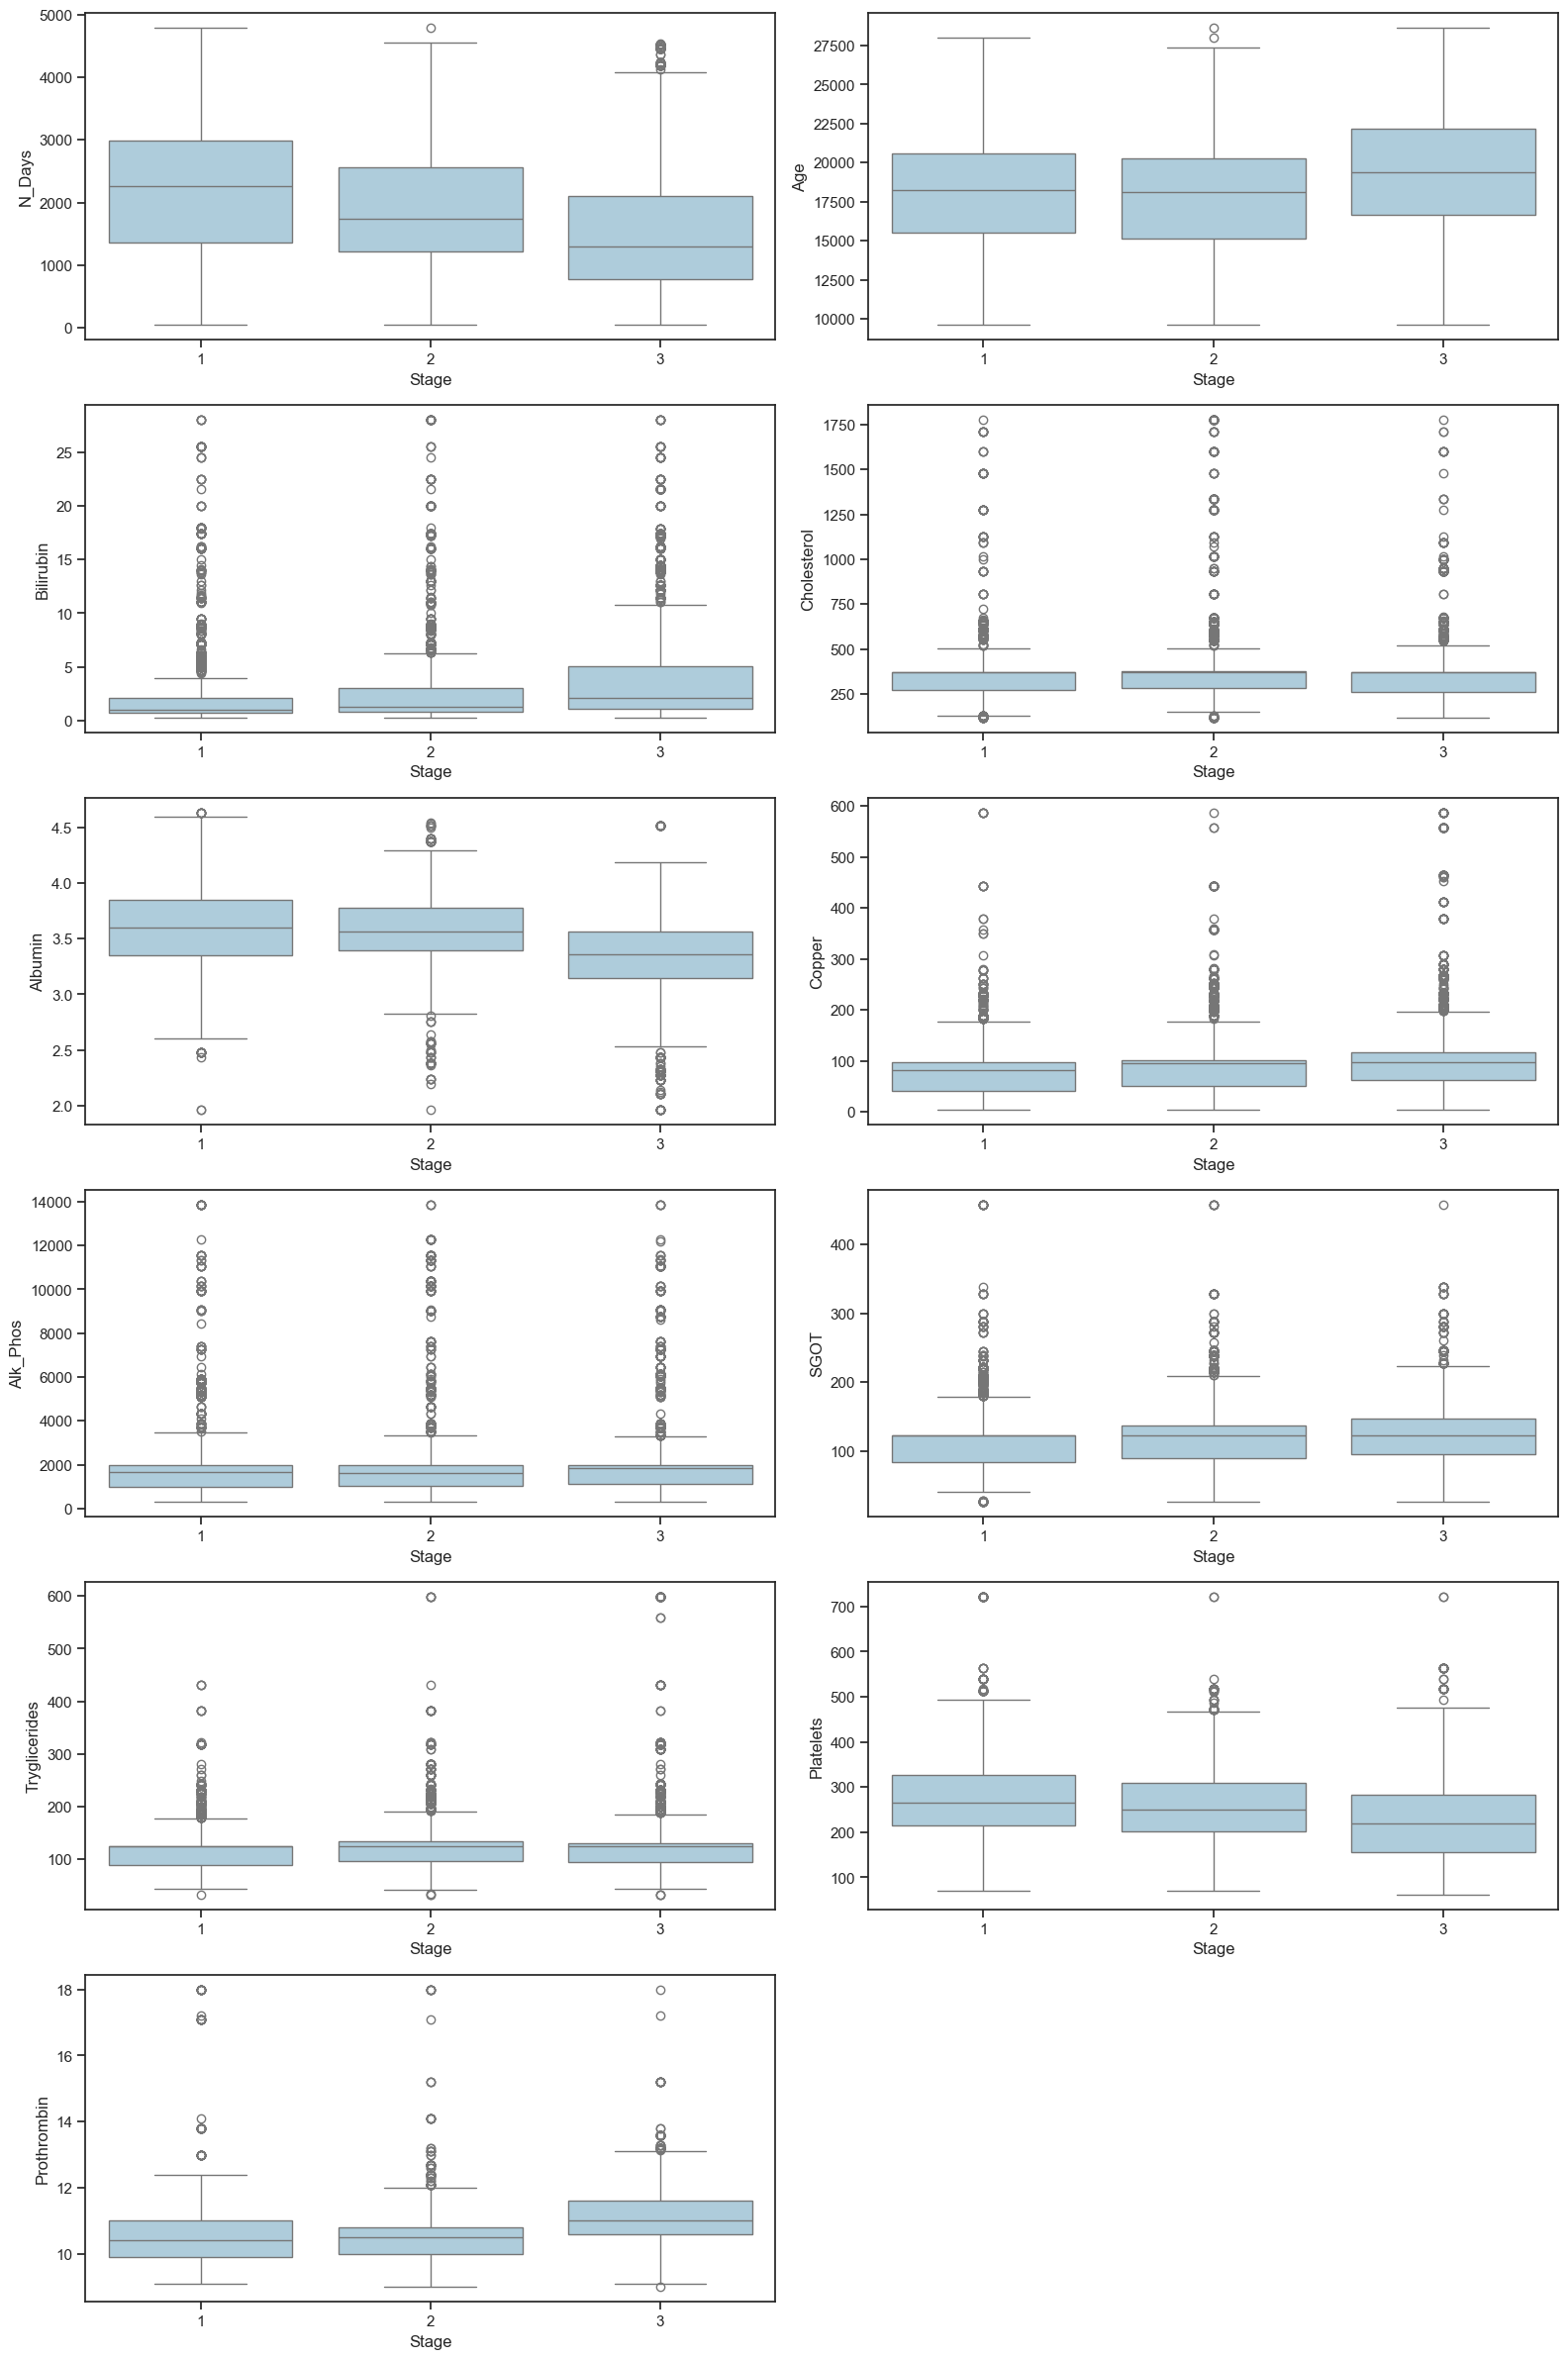

In [25]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_cols)/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(num_cols):
    sb.boxplot(data=df, x=target, y=feature, ax=ax[i])

# If the number of features is odd, remove the empty subplot
if len(num_cols) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

🔎 **Observations:** It's hard to observ any relation between the Stage of the cirrhosis and the numerical features that are provided in the dataset.

## 4.3. Multi-variate Analysis

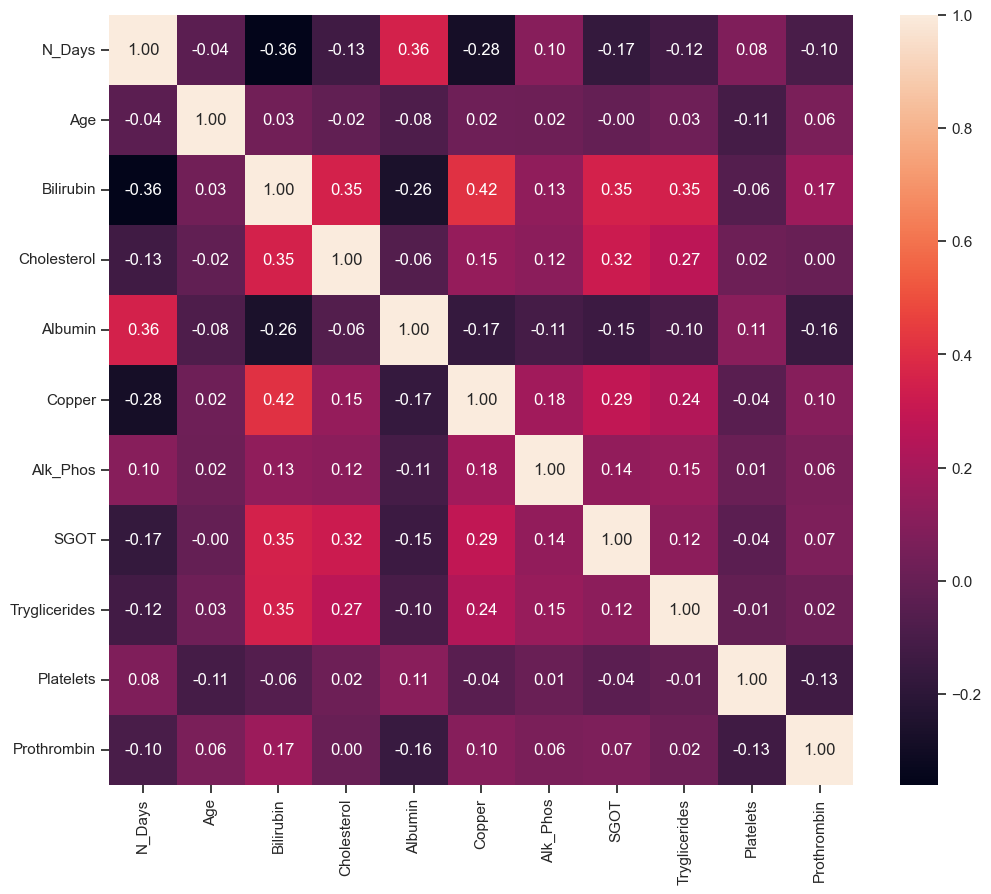

In [26]:
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

🔎 **Observations:**

- Bilirubin and Copper are highly correlated.
- Number of days and Blilrubin also have strong reverse correlation.
- Number of days have also strong correlation with Albumin.